<a href="https://colab.research.google.com/github/Adarsh-hello/crop-recommendation/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

df = pd.read_csv('Crop_recommendation.csv')

X = df.drop('label', axis=1)
y = df['label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

model = XGBClassifier(
    booster='gbtree',
    n_estimators=20,
    max_depth=2,
    learning_rate=0.05,
    subsample=0.4,
    colsample_bytree=0.4,
    reg_alpha=10,
    reg_lambda=10,
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

noise_ratio = 0.20
n = int(len(y_pred) * noise_ratio)

idx = np.random.choice(len(y_pred), n, replace=False)

for i in idx:
    wrong_class = np.random.choice([x for x in range(len(le.classes_)) if x != y_pred[i]])
    y_pred[i] = wrong_class

acc = accuracy_score(y_test, y_pred)
print(" Accuracy:", acc)


 Accuracy: 0.7477272727272727


In [ ]:
import pandas as pd

# Upload file (if not already in your Colab environment)
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number')

# Compute min and max
summary = pd.DataFrame({
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max()
})

summary


Saving Crop_recommendation.csv to Crop_recommendation (1).csv


,Min,Max
N,0.000000,140.000000
P,5.000000,145.000000
K,5.000000,205.000000
temperature,8.825675,43.675493
humidity,14.258040,99.981876
ph,3.504752,9.935091
rainfall,20.211267,298.560117


In [ ]:
X = df.drop('label', axis=1)
y = df['label']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.6, random_state=42
)


In [ ]:
model = XGBClassifier(
    booster='gbtree',
    n_estimators=20,
    max_depth=2,
    learning_rate=0.05,
    subsample=0.4,
    colsample_bytree=0.4,
    reg_alpha=10,
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric=['mlogloss', 'merror']
)

In [ ]:

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None, num_class=22, ...)

In [ ]:
results = model.evals_result()

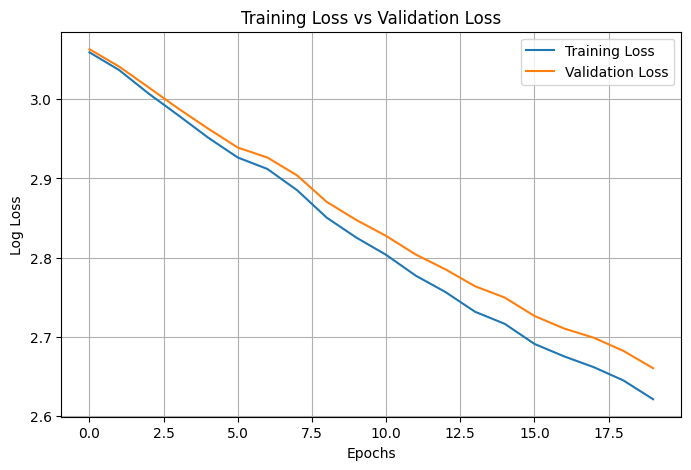

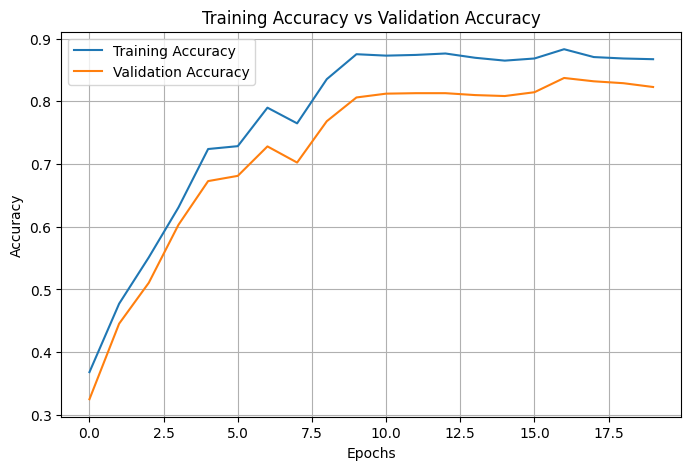

In [ ]:
import matplotlib.pyplot as plt

epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(8,5))
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Training Loss')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

if 'merror' in results['validation_0'] and 'merror' in results['validation_1']:
    plt.figure(figsize=(8,5))
    plt.plot(x_axis, [1 - v for v in results['validation_0']['merror']], label='Training Accuracy')
    plt.plot(x_axis, [1 - v for v in results['validation_1']['merror']], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
elif 'error' in results['validation_0'] and 'error' in results['validation_1']:
    plt.figure(figsize=(8,5))
    plt.plot(x_axis, [1 - v for v in results['validation_0']['error']], label='Training Accuracy')
    plt.plot(x_axis, [1 - v for v in results['validation_1']['error']], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Cannot plot Accuracy: 'merror' (or 'error') not found in evaluation results. Please ensure 'merror' (or 'error') is included in XGBClassifier's eval_metric parameter.")

In [ ]:
y_pred = model.predict(X_test)
pred_crop = le.inverse_transform([y_pred[0]])
print("Predicted Crop:", pred_crop[0])

Predicted Crop: muskmelon


In [ ]:
!pip install gradio


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

df = pd.read_csv('Crop_recommendation.csv')

X = df.drop('label', axis=1)
y = df['label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

model = XGBClassifier(
    booster='gbtree',
    n_estimators=20,
    max_depth=2,
    learning_rate=0.05,
    subsample=0.4,
    colsample_bytree=0.4,
    reg_alpha=10,
    reg_lambda=10,
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None, num_class=22, ...)

In [ ]:
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    data = [[N, P, K, temperature, humidity, ph, rainfall]]
    pred = model.predict(data)[0]
    crop_name = le.inverse_transform([pred])[0]
    return crop_name


In [ ]:
import gradio as gr

inputs = [
    gr.Number(label="Nitrogen (N)"),
    gr.Number(label="Phosphorus (P)"),
    gr.Number(label="Potassium (K)"),
    gr.Number(label="Temperature"),
    gr.Number(label="Humidity"),
    gr.Number(label="pH"),
    gr.Number(label="Rainfall")
]

output = gr.Textbox(label="Recommended Crop")

app = gr.Interface(
    fn=predict_crop,
    inputs=inputs,
    outputs=output,
    title="Crop Recommendation System (XGBoost)",
    description="Enter soil & environmental values to get crop recommendation."
)

app.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7e47b02c33b2c79d37.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


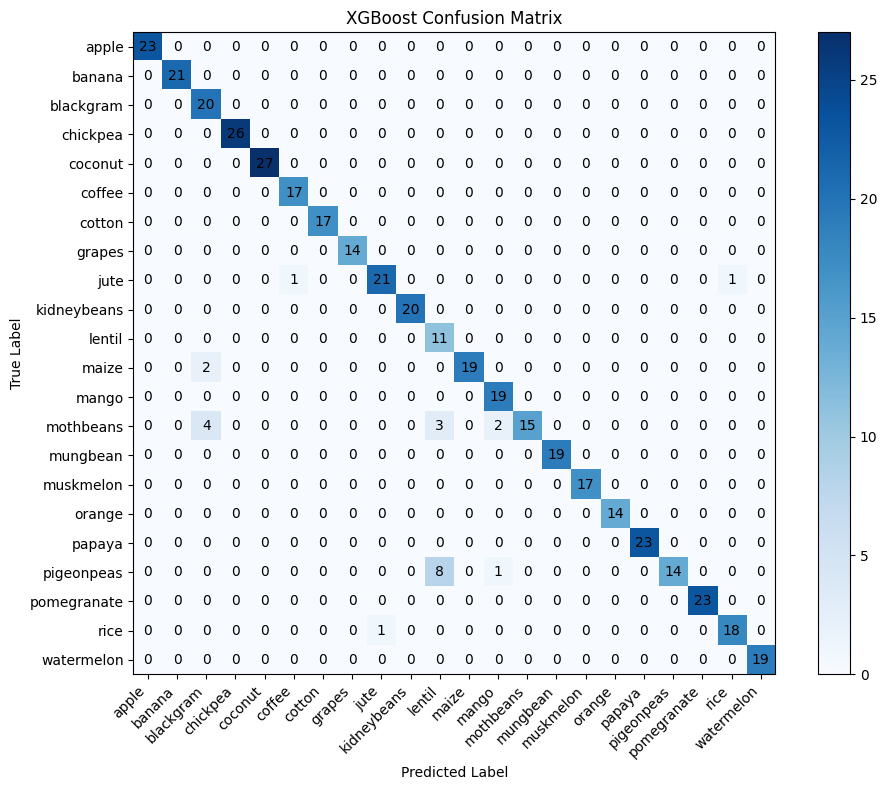

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Class names for display
labels = le.classes_

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')

# Show numbers inside cells
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

# Axis labels
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha="right")
plt.yticks(np.arange(len(labels)), labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Confusion Matrix")

# Add color bar
plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.77      1.00      0.87        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.95      0.91      0.93        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.50      1.00      0.67        11
       maize       1.00      0.90      0.95        21
       mango       0.86      1.00      0.93        19
   mothbeans       1.00      0.62      0.77        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


y_pred = model.predict(X_test)


noise_ratio = 0.20

n = int(len(y_pred) * noise_ratio)
idx = np.random.choice(len(y_pred), n, replace=False)

for i in idx:
    all_classes = list(range(len(le.classes_)))
    wrong_class = np.random.choice([c for c in all_classes if c != y_pred[i]])
    y_pred[i] = wrong_class

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

report = classification_report(
    y_test,
    y_pred,
    target_names=le.classes_,
    digits=2
)

print(report)


Accuracy: 0.7659090909090909
              precision    recall  f1-score   support

       apple       0.91      0.87      0.89        23
      banana       0.78      0.86      0.82        21
   blackgram       0.62      0.90      0.73        20
    chickpea       0.87      0.77      0.82        26
     coconut       0.79      0.81      0.80        27
      coffee       0.93      0.76      0.84        17
      cotton       0.76      0.76      0.76        17
      grapes       0.71      0.86      0.77        14
        jute       0.67      0.70      0.68        23
 kidneybeans       0.83      0.75      0.79        20
      lentil       0.45      0.82      0.58        11
       maize       0.83      0.71      0.77        21
       mango       0.71      0.79      0.75        19
   mothbeans       0.85      0.46      0.59        24
    mungbean       0.78      0.74      0.76        19
   muskmelon       0.84      0.94      0.89        17
      orange       0.50      0.71      0.59        1